In [10]:
import pandas as pd
import numpy as np
from keras.layers import Dense
from keras import optimizers
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Activation, Flatten, merge
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import ELU

In [16]:
X_train = pd.read_csv('~/HSE_final/table/df_train.csv')
X_test = pd.read_csv('~/HSE_final/table/df_test.csv')


In [17]:
audio_features = list(filter(lambda x:'audio' in x, X_train.keys()))
video_features = list(filter(lambda x:'video' in x, X_train.keys()))

In [22]:
np.random.seed(7)


input_shape = len(video_features)
output_shape = len(audio_features)

In [295]:
model = Sequential()
model.add(Dense(2048, input_dim=input_shape, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(output_shape, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [8]:
res[1]

array([ 0.89230126,  1.3941371 ,  0.98579913,  3.3361974 ,  2.195557  ,
        1.2530414 ,  0.9644252 , -0.42607063,  0.07474762, -0.50830185,
        0.18461438, -0.54767144,  0.03506276,  1.5943651 ,  1.8742266 ,
        0.84579873,  0.98255867, -0.27253973,  1.1689572 ,  1.0686231 ,
       -0.31171483, -0.08976948,  0.3814678 ,  0.7107428 ,  1.7990501 ,
        0.4920289 ,  3.6200342 ,  1.6878151 , -0.4945829 ,  0.18900318,
        2.0780978 ,  0.63692766, -0.45794052,  0.96197575,  0.26320785,
        2.6664755 ,  0.8380283 ,  3.5701902 , -0.6933936 , -0.43079978,
        1.2593828 ,  1.2588835 , -0.10282874,  1.0288118 ,  0.16230603,
        2.6510189 ,  0.8377318 , -0.31826973,  2.390283  , -0.450553  ,
       -0.24515873,  0.11350711, -0.12951404,  1.7678665 , -0.22886193,
        1.4979788 ,  2.7479937 ,  0.5739461 ,  1.8715106 ,  0.4987691 ,
        0.34426972, -0.18837082,  2.7177382 ,  2.9614282 , -0.43611145,
        3.47021   , -0.6807986 , -0.12234706,  1.136799  ,  1.32

In [297]:
X = X_train[video_features].get_values()
y = X_train[audio_features].get_values()


In [298]:
model.fit(X, y, batch_size=32, epochs=30)

Epoch 1/30
21965/21965 [==============================] - 35s 2ms/step - loss: 0.4639 - mean_squared_error: 0.4639
Epoch 2/30
21965/21965 [==============================] - 34s 2ms/step - loss: 0.4033 - mean_squared_error: 0.4033
Epoch 3/30
21965/21965 [==============================] - 33s 2ms/step - loss: 0.3643 - mean_squared_error: 0.3643
Epoch 4/30
21965/21965 [==============================] - 33s 2ms/step - loss: 0.3404 - mean_squared_error: 0.3404
Epoch 5/30
21965/21965 [==============================] - 33s 2ms/step - loss: 0.3185 - mean_squared_error: 0.3185
Epoch 6/30
21965/21965 [==============================] - 35s 2ms/step - loss: 0.3079 - mean_squared_error: 0.3079
Epoch 7/30
21965/21965 [==============================] - 35s 2ms/step - loss: 0.2976 - mean_squared_error: 0.2976
Epoch 8/30
21965/21965 [==============================] - 35s 2ms/step - loss: 0.2897 - mean_squared_error: 0.2897
Epoch 9/30
21965/21965 [==============================] - 35s 2ms/step - loss: 0

In [299]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 2048)              2050048   
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_14 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
Total params: 4,935,680
Trainable params: 4,935,680
Non-trainable params: 0
_________________________________________________________________


In [300]:
y_predict = model.predict(X_test[video_features].get_values())

In [301]:
from sklearn.metrics.pairwise import cosine_distances

In [302]:
y_predict.shape

(7626, 512)

In [303]:
list_features = ['ID'] + audio_features

In [304]:
X_test_fixed = X_test[list_features]

In [305]:
X_test_fixed.head()

,ID,audio_0,audio_1,audio_10,audio_100,audio_101,audio_102,audio_103,audio_104,audio_105,...,audio_90,audio_91,audio_92,audio_93,audio_94,audio_95,audio_96,audio_97,audio_98,audio_99
0,MgHioCC3yCo,3.465994,5.485182,1.392198,2.075205,0.525350,0.507040,2.051694,-0.095109,-0.136603,...,-0.295202,2.284770,0.750015,4.624533,-0.345154,0.943214,1.127614,0.562000,1.844403,2.329274
1,MgHioCC3yCo,2.025639,-0.000835,-0.107687,2.771719,-0.002794,0.302232,1.310762,1.159659,0.797841,...,1.138866,1.755250,0.532314,1.272975,3.320303,1.685649,2.047887,0.694619,-0.220732,-0.401569
2,MgHioCC3yCo,0.641804,-0.073039,0.378311,0.106902,0.236905,0.780073,-0.287821,1.297422,1.995879,...,1.814272,0.650161,1.366028,-0.159636,0.158432,1.427510,2.037729,0.955185,0.665984,0.385377
3,MgHioCC3yCo,0.981787,-0.122698,0.505672,-0.271406,0.432142,0.388763,0.684052,0.117507,1.275299,...,1.364909,1.243732,0.844132,0.533207,0.617010,1.568594,2.970192,1.120759,0.112360,-0.278555
4,MgHioCC3yCo,0.878753,0.750289,0.569910,0.186085,0.435217,0.875443,0.170807,0.834477,1.350631,...,1.760716,0.520016,1.068539,0.303000,-0.348881,0.282995,1.042602,0.589957,0.804173,0.063118


In [306]:
dictionary = cosine_distances(y_predict, X_test_fixed[audio_features])

In [307]:
dictionary[0][1]

0.46523048120152777

In [308]:
dictionary[1][0]

0.43416451252132227

In [309]:
from tqdm import tqdm_notebook

In [310]:
dick = {}

In [311]:
for index, row in X_test_fixed.iterrows():
    dick[index]  = str(row['ID'])

In [312]:
res = []

In [313]:
for i in tqdm_notebook(range(len(dictionary))):
    f = dictionary[i]
    l = sorted(range(len(f)), key=lambda k: f[k], reverse = True)
    res.append(l)

In [314]:
similarity_list = []

In [315]:
from collections import OrderedDict

In [316]:
for i in tqdm_notebook(range(len(res))):
    d = res[i].copy()
    for i in range(len(d)):
        d[i] = dick[d[i]]
    similarity_list.append(list(OrderedDict.fromkeys(d)))

In [317]:
len(similarity_list[111])

64

In [318]:
s = X_test_fixed['ID'].values

In [319]:
import numpy as np

def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """

    if actual in predicted[:k + 1]:
        return 1
    else:
        return 0

def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [ ]:
k_accuracy = {}

In [325]:
for i in tqdm_notebook(range(64)):
    k_accuracy[i + 1] = mapk(s, similarity_list, k = i)

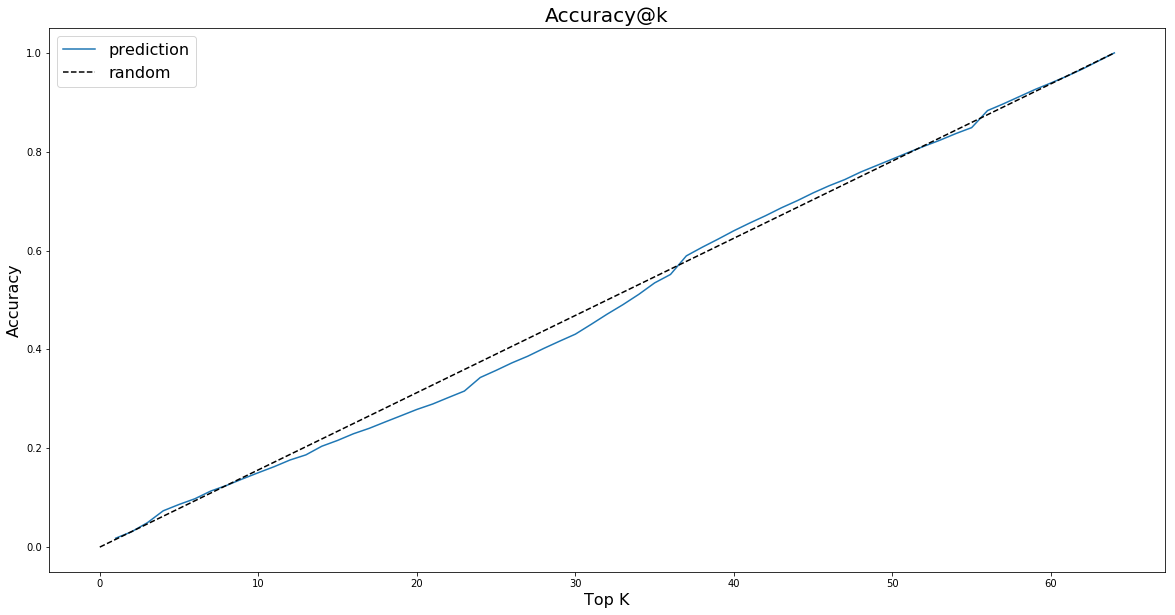

In [327]:
import matplotlib.pylab as plt

lists = sorted(k_accuracy.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize = (20, 10))
plt.xlabel('Top K', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.title('Accuracy@k', fontsize = 20)
plt.plot(x, y, label = 'prediction')
plt.plot([0, 64], [0, 1], '--', color = 'black', label = 'random')
plt.legend(fontsize=16)
plt.show()

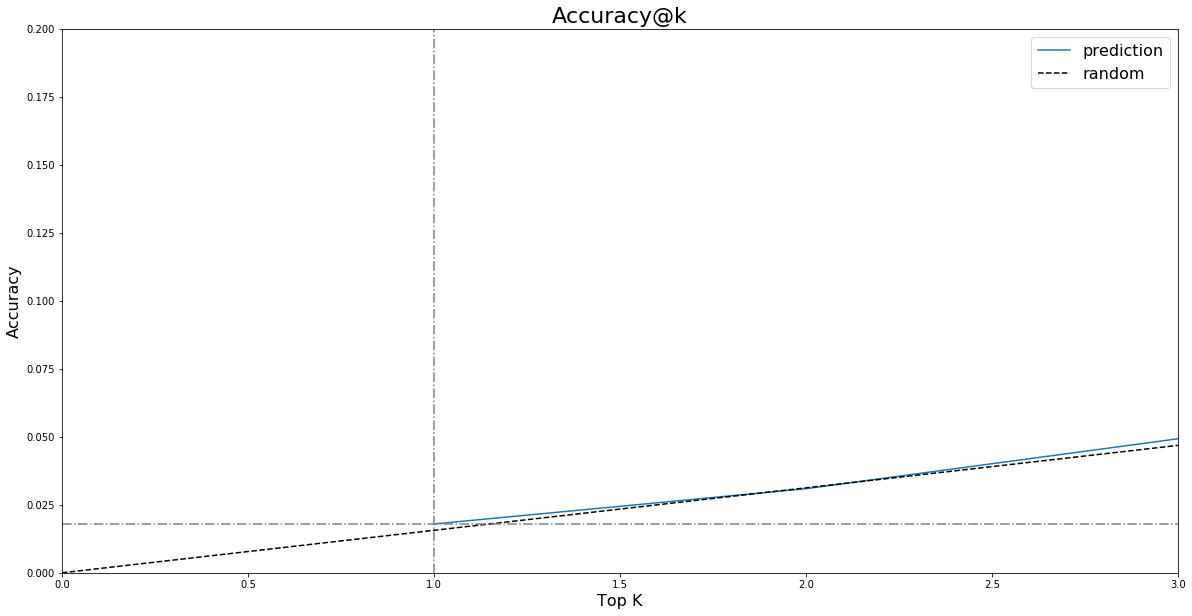

In [328]:
import matplotlib.pylab as plt

lists = sorted(k_accuracy.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize = (20, 10))
plt.xlabel('Top K', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.title('Accuracy@k', fontsize = 22)
plt.plot(x, y, label = 'prediction')
plt.plot([0, 64], [0, 1], '--', color = 'black', label = 'random')
plt.xlim(0, 3)
plt.ylim(0, 0.2)
plt.legend(fontsize=16)
plt.plot([1,1], [0, 0.2], '-.', color = 'grey')
plt.plot([0,10], [y[0], y[0]], '-.', color = 'grey')
plt.show()